# SC1015 Mini Project: FCSE Group 04 

Group members: CHEAH JUN AN DOUGLAS, KOH PING HUI BRYAN, LI ZHONGYUAN

# Part 1: Data Cleaning and Preparation

## Importing of data from our dataset 

In [1]:
!pip install kmodes
!pip install statsmodels==0.14.1

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import scipy as scp
import sklearn
sb.set() # set the default Seaborn style for graphics

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier
import statsmodels.api as sm
from scipy.stats import chi2_contingency      # for chi-sqaure test 
from IPython.display import clear_output
from kmodes.kmodes import KModes
from sklearn.svm import SVC

data = pd.read_csv('smmh.csv')


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


## Option Renaming



### Columns

The first thing we will rename are the columns for easier reference. 

In [2]:
data.rename(columns = {'1. What is your age?':'Age','2. Gender':'Gender','3. Relationship Status':'Relationship Status',
                       '4. Occupation Status':'Occupation',
                       '5. What type of organizations are you affiliated with?':'Affiliations',
                       '6. Do you use social media?':'Social Media User?',
                       '7. What social media platforms do you commonly use?':'Platforms Used',
                       '8. What is the average time you spend on social media every day?':'Time_Spent',
                       '9. How often do you find yourself using Social media without a specific purpose?':'Mindless Scrolling Frequency',
                       '10. How often do you get distracted by Social media when you are busy doing something?':'Social Media distraction Frequency',
                       "11. Do you feel restless if you haven't used Social media in a while?":'Restlessness Frequency',
                       '12. On a scale of 1 to 5, how easily distracted are you?':'Distracted frequency',
                       '13. On a scale of 1 to 5, how much are you bothered by worries?':'Worry frequency',
                       '14. Do you find it difficult to concentrate on things?':'Concentration difficulty frequency',
                       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?':'Self comparisons frequency',
                       '16. Following the previous question, how do you feel about these comparisons, generally speaking?':'Self invalidation frequency',
                       '17. How often do you look to seek validation from features of social media?':'Social media validation seeking frequency',
                       '18. How often do you feel depressed or down?':'Depressed emotion frequency',
                       '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?':'Daily activity interest fluctuation frequency',
                       '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'Sleep issue frequency'
                       },inplace=True)

CleansedDF = data
CleansedDF                      

,Timestamp,Age,Gender,Relationship Status,Occupation,Affiliations,Social Media User?,Platforms Used,Time_Spent,Mindless Scrolling Frequency,...,Restlessness Frequency,Distracted frequency,Worry frequency,Concentration difficulty frequency,Self comparisons frequency,Self invalidation frequency,Social media validation seeking frequency,Depressed emotion frequency,Daily activity interest fluctuation frequency,Sleep issue frequency
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,3,4,3,4,4,2,4,3,4,4
477,5/22/2022 0:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,...,2,3,4,4,4,2,4,4,4,1
478,5/22/2022 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,...,4,3,2,3,3,3,4,2,2,2
479,7/14/2022 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,...,2,3,3,2,2,3,4,4,5,4


### Time category

Next, we will rename the time value from a string to integer.

In [3]:
# Convert average time spent on social media to numeric value
def convert_time_category_to_value(a):
    if a == "More than 5 hours":
        return 5
    elif a == "Between 4 and 5 hours":
        return 4
    elif a == "Between 3 and 4 hours":
        return 3
    elif a == "Between 2 and 3 hours":
        return 2
    elif a == "Between 1 and 2 hours":
        return 1
    elif a == "Less than an Hour":
        return 1
    else:
        return None 

CleansedDF['Time_Spent'] = CleansedDF['Time_Spent'].apply(convert_time_category_to_value)

## Data Elimination

### Students

Next, we shall eliminate anyone that are not students

In [4]:
student = CleansedDF[CleansedDF["Occupation"].str.contains("Student") == True]

### Non Social Media users
Next, we remove non social media users.

In [5]:
student_noSocial = student[student["Social Media User?"].str.contains("No") == False]

### Unneeded Miscellaneous Details 

Following up with that, we will remove 

'Relationship Status','Platforms Used','Gender' , 'Timestamp', 'Age','Occupation','Affiliations', 'Social Media User?'

colums, with the justification that we are only exploring this problem for students and social media users, making these details unneeded.

In [6]:
CleansedDF = student_noSocial.drop(['Relationship Status','Platforms Used','Gender' , 'Timestamp', 'Age','Occupation','Affiliations', 'Social Media User?'], axis=1)
CleansedDF

,Time_Spent,Mindless Scrolling Frequency,Social Media distraction Frequency,Restlessness Frequency,Distracted frequency,Worry frequency,Concentration difficulty frequency,Self comparisons frequency,Self invalidation frequency,Social media validation seeking frequency,Depressed emotion frequency,Daily activity interest fluctuation frequency,Sleep issue frequency
0,2,5,3,2,5,2,5,2,3,2,5,4,5
1,5,4,3,2,4,5,4,5,1,1,5,4,5
2,3,3,2,1,2,5,4,3,3,1,4,2,5
3,5,4,2,1,3,5,3,5,1,2,4,3,2
4,2,3,5,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,4,1,1,1,3,3,3,3,3,3,1,1,1
470,1,2,2,1,3,5,3,5,1,2,5,4,5
471,5,5,4,2,4,5,3,1,3,2,4,3,4
473,2,4,4,3,3,4,4,4,5,3,4,3,4


## Merging of data columns to reduce skewness

Noticing the spread of our user responses, we decided that merging datasets in order to make the dataset more balanced will result in a better dataset to train our model, which will enhance performance down the line.

In [7]:
# Convert average time spent on social media to numeric value
def convert_msf(msf):
    if msf == 1:
        return 1
    elif msf == 2:
        return 1
    elif msf == 3:
        return 2
    elif msf == 4:
        return 3
    elif msf == 5:
        return 4
    else:
        return None 

CleansedDF['Mindless Scrolling Frequency'] = CleansedDF['Mindless Scrolling Frequency'].apply(convert_msf)

# Convert average time spent on social media to numeric value
def convert_smdf(smdf):
    if smdf == 1:
        return 1
    elif smdf == 2:
        return 1
    elif smdf == 3:
        return 2
    elif smdf == 4:
        return 3
    elif smdf == 5:
        return 4
    else:
        return None 

CleansedDF['Social Media distraction Frequency'] = CleansedDF['Social Media distraction Frequency'].apply(convert_smdf)

# Convert average time spent on social media to numeric value
def convert_rf(rf):
    if rf == 1:
        return 1
    elif rf == 2:
        return 2
    elif rf == 3:
        return 3
    elif rf == 4:
        return 4
    elif rf == 5:
        return 4
    else:
        return None 

CleansedDF['Restlessness Frequency'] = CleansedDF['Restlessness Frequency'].apply(convert_rf)

# Convert average time spent on social media to numeric value
def convert_df(df):
    if df == 1:
        return 1
    elif df == 2:
        return 1
    elif df == 3:
        return 2
    elif df == 4:
        return 3
    elif df == 5:
        return 4
    else:
        return None 

CleansedDF['Distracted frequency'] = CleansedDF['Distracted frequency'].apply(convert_df)

# Convert average time spent on social media to numeric value
def convert_wf(wf):
    if wf == 1:
        return 1
    elif wf == 2:
        return 1
    elif wf == 3:
        return 1
    elif wf == 4:
        return 2
    elif wf == 5:
        return 3
    else:
        return None 

CleansedDF['Worry frequency'] = CleansedDF['Worry frequency'].apply(convert_wf)

# Convert average time spent on social media to numeric value
def convert_cdf(cdf):
    if cdf == 1:
        return 1
    elif cdf == 2:
        return 1
    elif cdf == 3:
        return 2
    elif cdf == 4:
        return 3
    elif cdf == 5:
        return 4
    else:
        return None 

CleansedDF['Concentration difficulty frequency'] = CleansedDF['Concentration difficulty frequency'].apply(convert_cdf)

# Convert average time spent on social media to numeric value
def convert_scf(scf):
    if scf == 1:
        return 1
    elif scf == 2:
        return 2
    elif scf == 3:
        return 3
    elif scf == 4:
        return 4
    elif scf == 5:
        return 5
    else:
        return None 

CleansedDF['Self comparisons frequency'] = CleansedDF['Self comparisons frequency'].apply(convert_scf)

# Convert average time spent on social media to numeric value
def convert_sif(sif):
    if sif == 1:
        return 1
    elif sif == 2:
        return 1
    elif sif == 3:
        return 2
    elif sif == 4:
        return 3
    elif sif == 5:
        return 3
    else:
        return None 

CleansedDF['Self invalidation frequency'] = CleansedDF['Self invalidation frequency'].apply(convert_sif)

# Convert average time spent on social media to numeric value
def convert_smvsf(smvsf):
    if smvsf == 1:
        return 1
    elif smvsf == 2:
        return 2
    elif smvsf == 3:
        return 3
    elif smvsf == 4:
        return 4
    elif smvsf == 5:
        return 4
    else:
        return None 

CleansedDF['Social media validation seeking frequency'] = CleansedDF['Social media validation seeking frequency'].apply(convert_smvsf)

# Convert average time spent on social media to numeric value
def convert_def(de):
    if de == 1:
        return 1
    elif de == 2:
        return 1
    elif de == 3:
        return 2
    elif de == 4:
        return 3
    elif de == 5:
        return 4
    else:
        return None 

CleansedDF['Depressed emotion frequency'] = CleansedDF['Depressed emotion frequency'].apply(convert_def)

# Convert average time spent on social media to numeric value
def convert_daiff(daiff):
    if daiff == 1:
        return 1
    elif daiff == 2:
        return 1
    elif daiff == 3:
        return 2
    elif daiff == 4:
        return 3
    elif daiff == 5:
        return 4
    else:
        return None 

CleansedDF['Daily activity interest fluctuation frequency'] = CleansedDF['Daily activity interest fluctuation frequency'].apply(convert_daiff)

# Convert average time spent on social media to numeric value
def convert_sif(sif):
    if sif == 1:
        return 1
    elif sif == 2:
        return 2
    elif sif == 3:
        return 3
    elif sif == 4:
        return 4
    elif sif == 5:
        return 5
    else:
        return None 

CleansedDF['Sleep issue frequency'] = CleansedDF['Sleep issue frequency'].apply(convert_sif)

Now, we will examine individual variables by plotting it, ensuring that we managed to regulate the data.

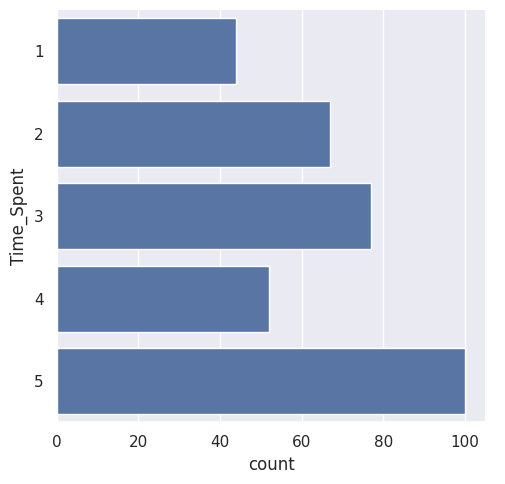

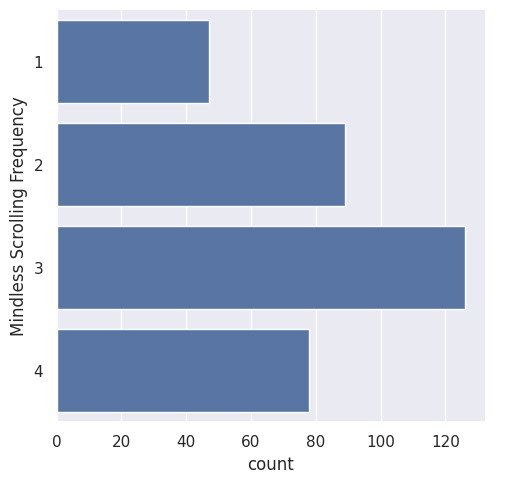

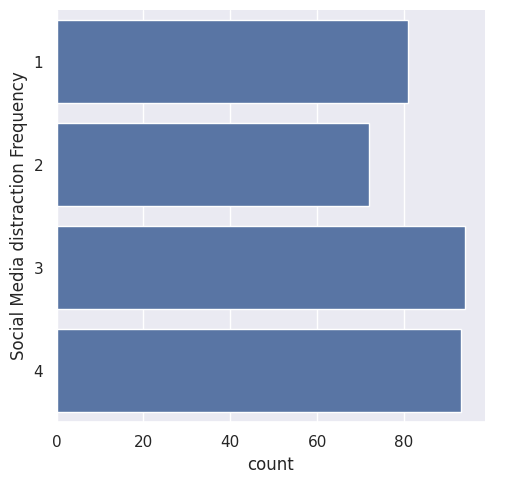

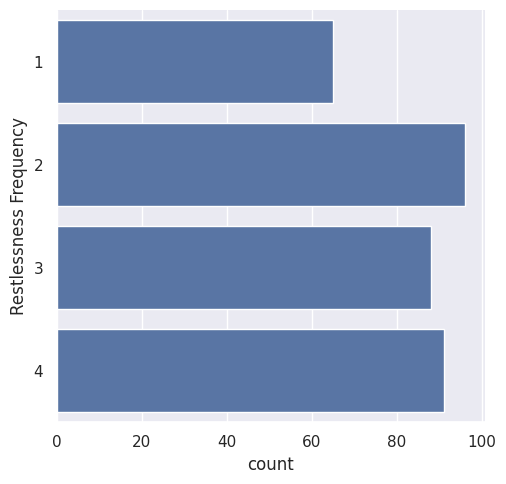

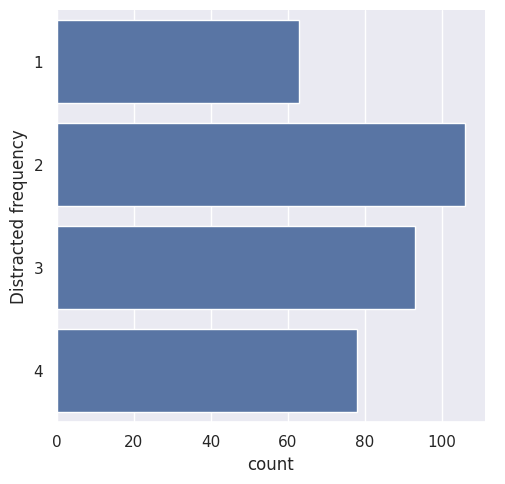

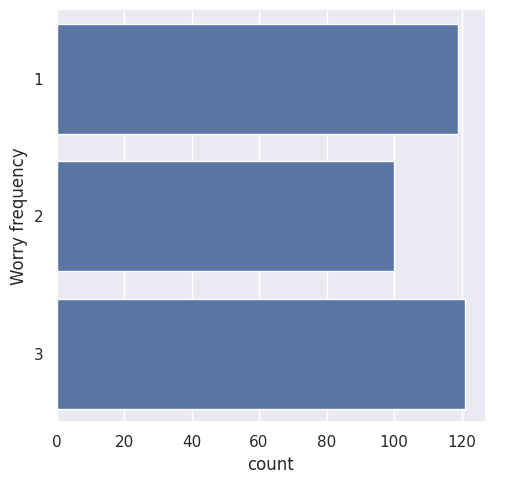

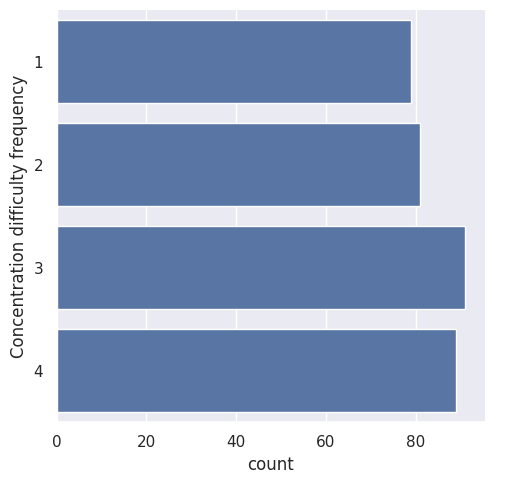

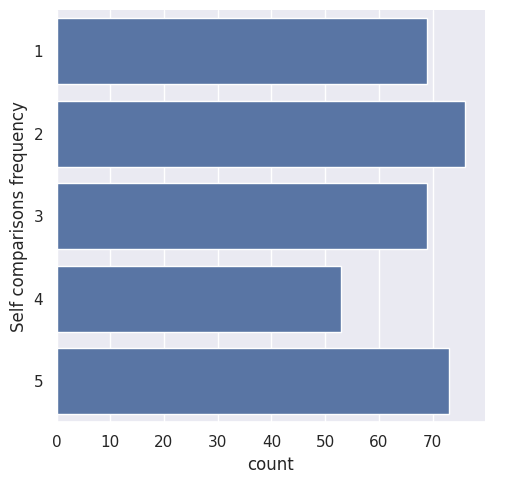

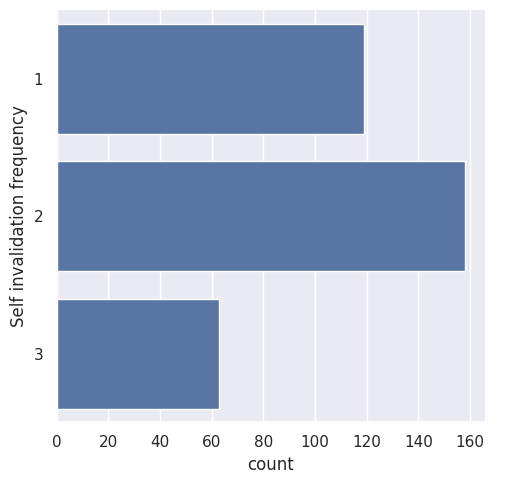

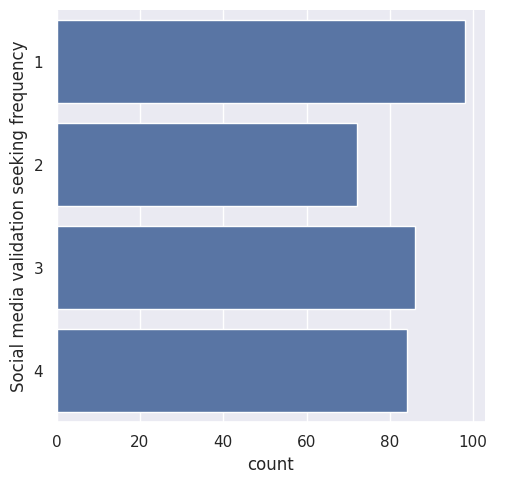

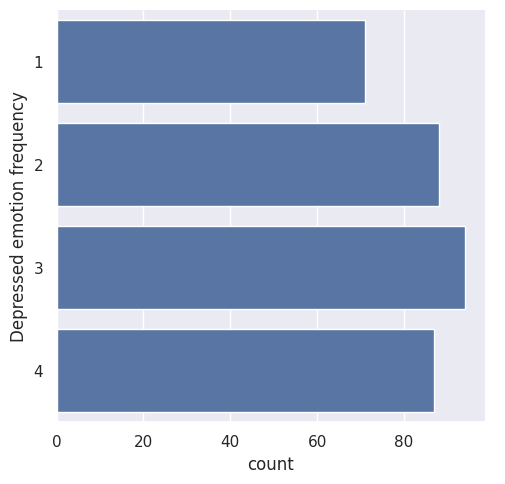

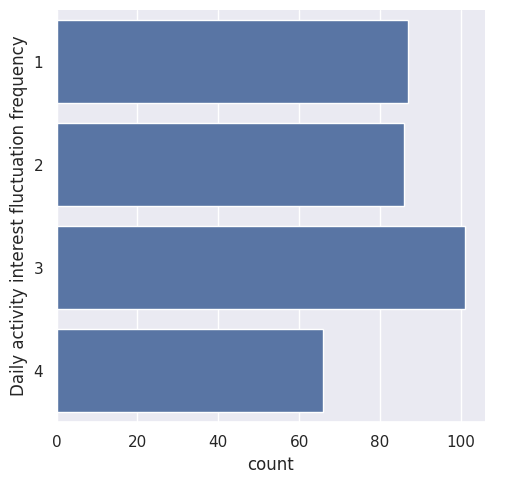

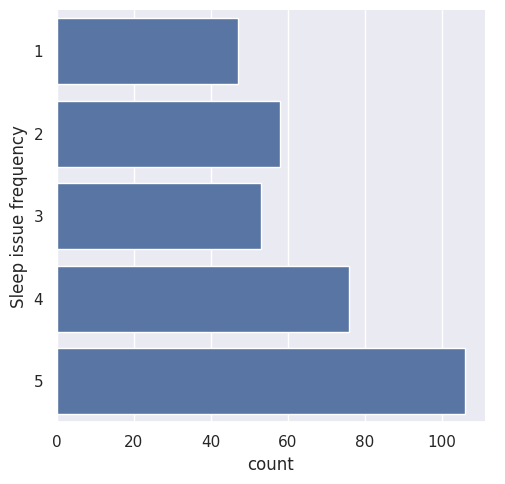

In [8]:
sb.catplot(y = 'Time_Spent', data = CleansedDF, kind = "count")
sb.catplot(y = 'Mindless Scrolling Frequency', data = CleansedDF, kind = "count")
sb.catplot(y = 'Social Media distraction Frequency', data = CleansedDF, kind = "count")
sb.catplot(y = 'Restlessness Frequency', data = CleansedDF, kind = "count")
sb.catplot(y = 'Distracted frequency', data = CleansedDF, kind = "count")
sb.catplot(y = 'Worry frequency', data = CleansedDF, kind = "count")
sb.catplot(y = 'Concentration difficulty frequency', data = CleansedDF, kind = "count")
sb.catplot(y = 'Self comparisons frequency', data = CleansedDF, kind = "count")
sb.catplot(y = 'Self invalidation frequency', data = CleansedDF, kind = "count")
sb.catplot(y = 'Social media validation seeking frequency', data = CleansedDF, kind = "count")
sb.catplot(y = 'Depressed emotion frequency', data = CleansedDF, kind = "count")
sb.catplot(y = 'Daily activity interest fluctuation frequency', data = CleansedDF, kind = "count")
sb.catplot(y = 'Sleep issue frequency', data = CleansedDF, kind = "count") 

# Part 2: Data analysis 

## Chi-Square Test

Chi-Square test is used to determine if there is any relationship between the 13 categorical features and time spent on social media 

The significance level represents the threshold at which you're willing to reject the null hypothesis. It's the probability of rejecting the null hypothesis when it is actually true.

The p-value is a measure of the strength of the evidence against the null hypothesis. It indicates the probability of obtaining a test statistic result as extreme as, or more extreme than, the one observed in the data, assuming that the null hypothesis is true.

A small p-value (typically less than the chosen significance level α) suggests that the observed data is unlikely under the null hypothesis, leading to the rejection of the null hypothesis in favor of the alternative hypothesis.

Conversely, a large p-value suggests that the observed data is likely under the null hypothesis, indicating that there is not enough evidence to reject the null hypothesis.


In our problem, we let the Null hypothesis (H0) to be no significant association between categorical variables and Alternative hypothesis (H1) to be significant association between categorical variables. 

There is a significant association between Time Spent and Mindless Scrolling Frequency
There is a significant association between Time Spent and Social Media distraction Frequency
There is a significant association between Time Spent and Restlessness Frequency
There is a significant association between Time Spent and Worry frequency
There is a significant association between Time Spent and Self comparisons frequency
There is a significant association between Time Spent and Depressed emotion frequency


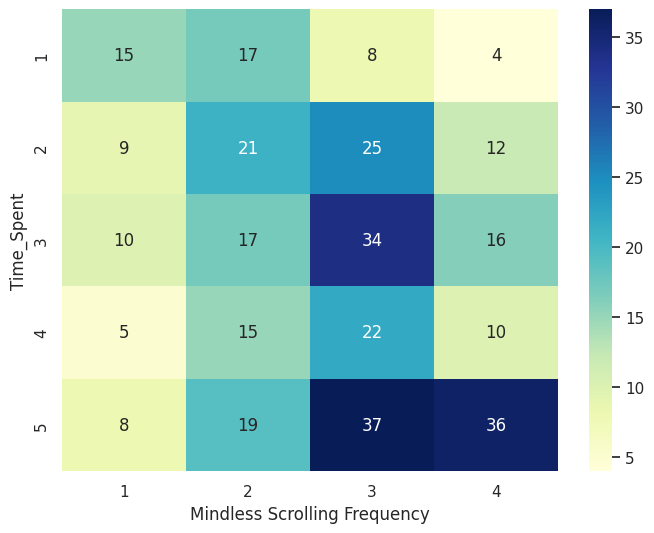

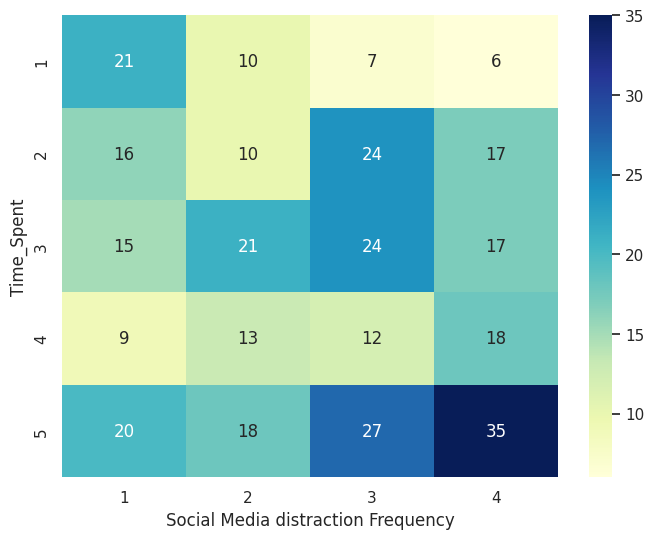

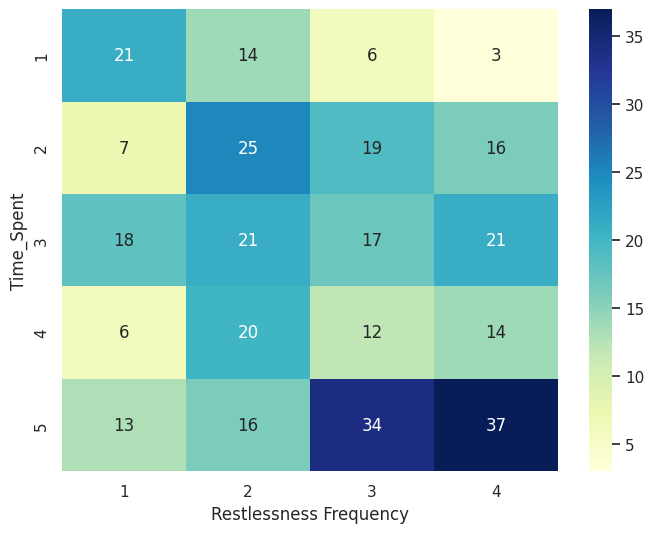

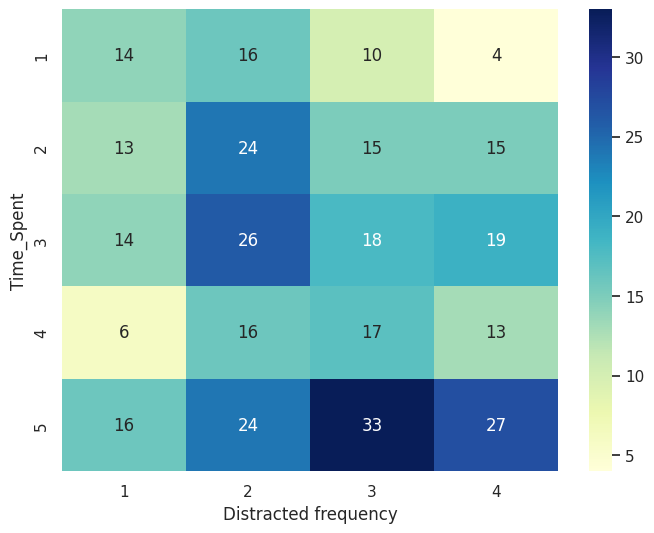

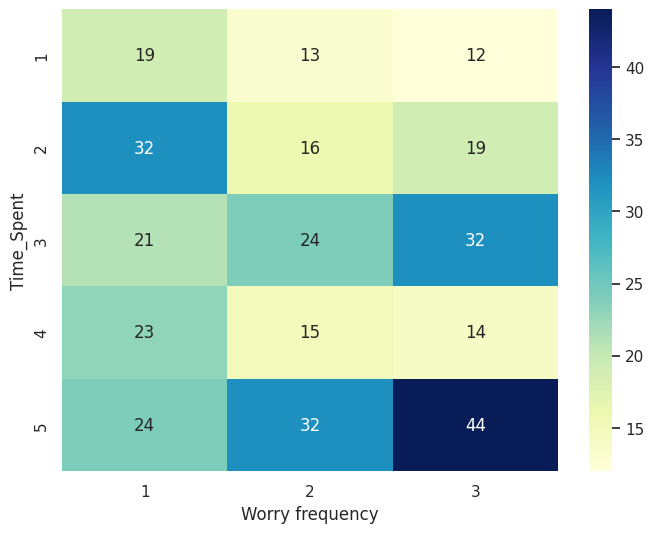

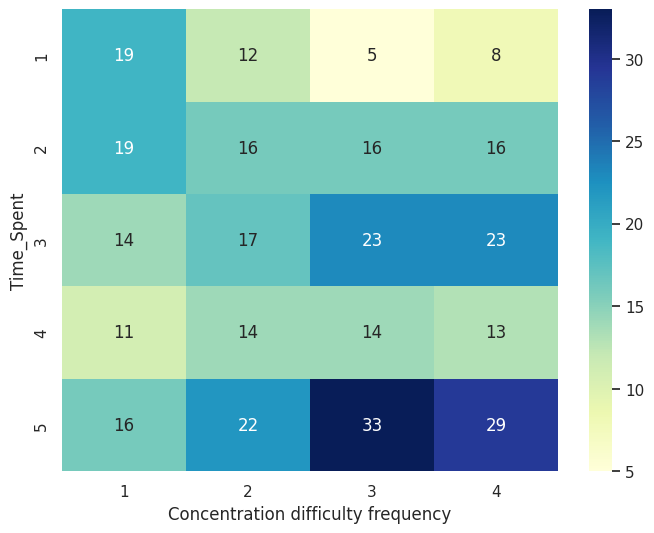

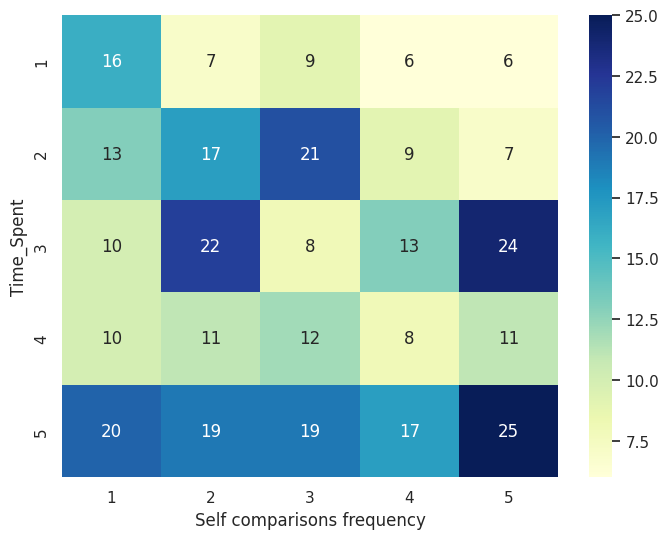

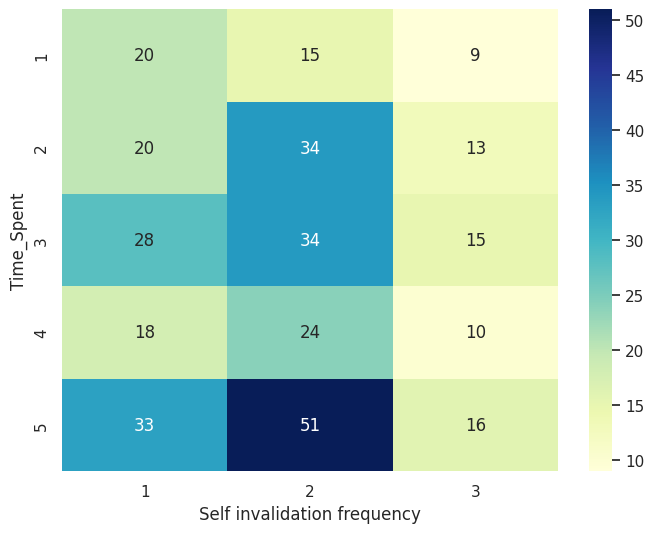

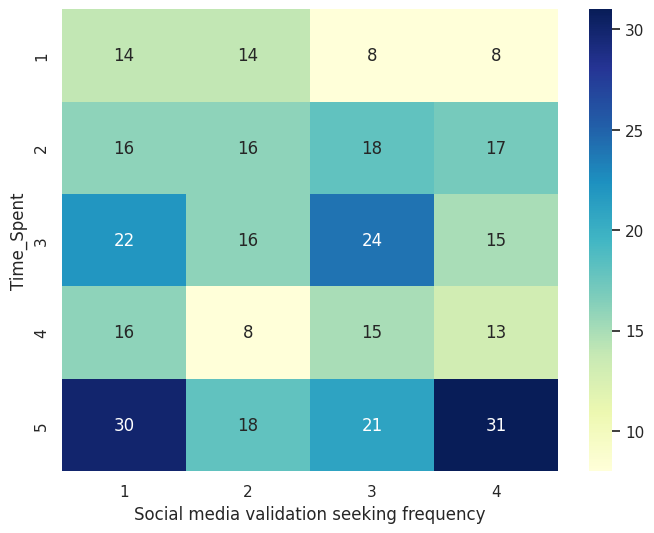

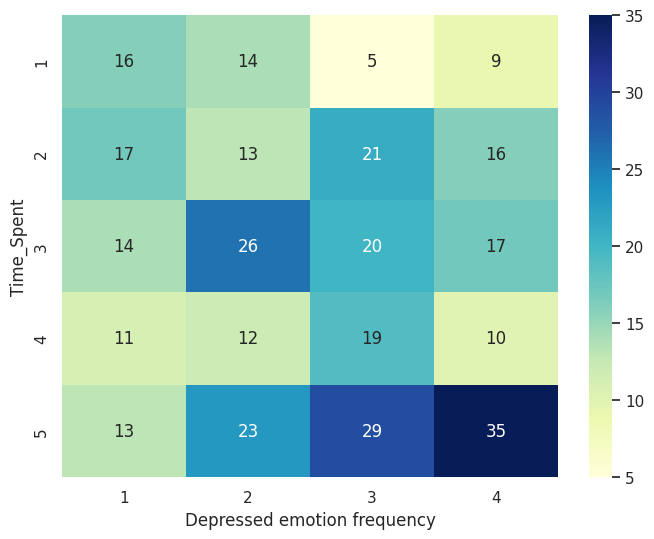

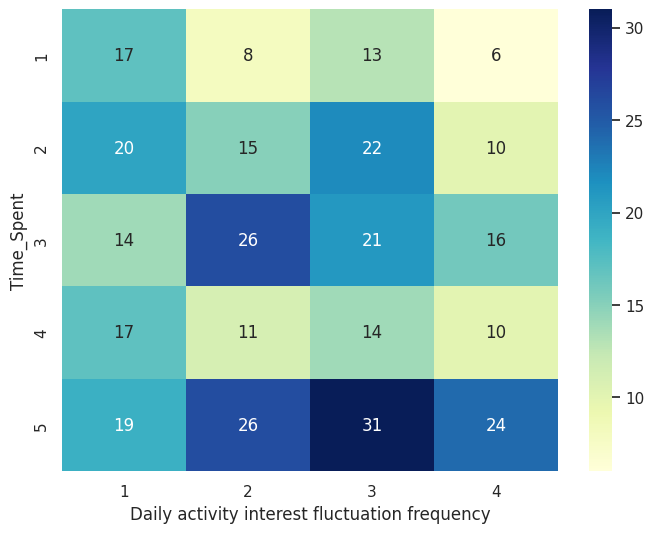

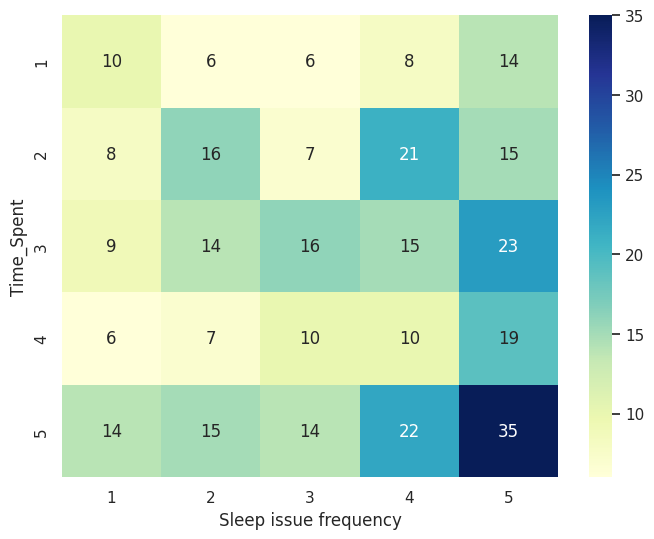

In [9]:
features = ['Mindless Scrolling Frequency', 'Social Media distraction Frequency','Restlessness Frequency', 'Distracted frequency','Worry frequency', 'Concentration difficulty frequency', 'Self comparisons frequency','Self invalidation frequency','Social media validation seeking frequency','Depressed emotion frequency','Daily activity interest fluctuation frequency', 'Sleep issue frequency']

for element in features:
    contingency_table1 = pd.crosstab(CleansedDF['Time_Spent'], CleansedDF[element])  #contingency table plotted in heatmap
    plt.figure(figsize=(8, 6))
    sb.heatmap(contingency_table1, annot=True, cmap='YlGnBu', fmt='d')
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table1)
    if p_val < 0.05:   
        print("There is a significant association between Time Spent and", element) 

From the result of the chi-square test, we have identified the following features to have significant assocaition with Time Spent on Social Media 


1) Mindless Scrolling Frequency
2) Social Media distraction Frequency 
3) Restlessness Frequency
4) Worry frequency
5) Self comparisons frequency
6) Depressed emotion frequency

## K-Modes Algorithm

The K-modes algorithm is a clustering technique used to group data points with similar characteristics, especially when dealing with categorical data. 

Here's how it works:

It begins with an initial guess of the cluster centers (centroids). From these initial centroids, the algorithm iterates to refine their positions by:

1. Assigning each data point to the closest centroid based on a specified distance or dissimilarity measure.
2. Updating the centroids based on the assigned data points. In k-modes, this involves setting each centroid to the most common category for each feature within the cluster.
3. Repeating these steps until the centroids stabilize—when their positions and the cluster assignments stop changing significantly with further iterations.

In our problem, the goal is to cluster respondents with similar characteristics, allowing us to gain insights from groups of respondents rather than examining them individually. By clustering, we can better understand common patterns and behaviors within each group, leading to more robust analyses and conclusions.

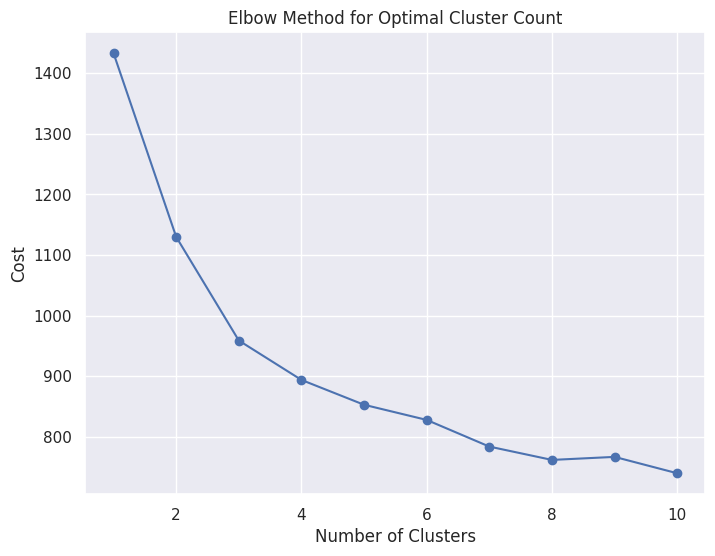

In [10]:
# 6 variables from chi-sqaure test
features = ['Mindless Scrolling Frequency', 'Social Media distraction Frequency', 'Restlessness Frequency', 'Worry frequency', 'Self comparisons frequency', 'Depressed emotion frequency']

df_features = CleansedDF[features]

# List to store the costs for different numbers of clusters
costs = []

# Testing cluster counts from 1 to 10
cluster_range = range(1, 11)  

# Test different numbers of clusters and store the cost for each
for k in cluster_range:
    km = KModes(n_clusters=k, init='Huang', n_init=10, verbose=1, random_state=42)  # Initialize k-modes
    km.fit(df_features)  # Fit the model to the data
    costs.append(km.cost_)  # Store the cost for the current number of clusters
clear_output()
# Plot the elbow curve to visualize the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, costs, marker='o')  # Plot the costs against the number of clusters
plt.xlabel('Number of Clusters')  # X-axis label
plt.ylabel('Cost')  # Y-axis label
plt.title('Elbow Method for Optimal Cluster Count')  # Plot title
plt.show()  # Display the plot


In [11]:
# 6 variables from chi-sqaure test
features = ['Mindless Scrolling Frequency', 'Social Media distraction Frequency', 'Restlessness Frequency', 'Worry frequency', 'Self comparisons frequency', 'Depressed emotion frequency']

df_features = CleansedDF[features]

# Initialize KModes with the desired number of clusters, using the 'Huang' initialization method which is suitable for categorical data
n_clusters = 3  # 3 is the optimal clusters
km = KModes(n_clusters=n_clusters, init='Huang', n_init=10, verbose=1, random_state=42) #use random state to fix the choice of the cluster centroids 

clusters = km.fit_predict(df_features)
clear_output()
#Cost: Represents the total dissimilarity of all points to their respective centroids. Lower costs indicate better clustering.
# Optionally, calculate the cost (a measure of dissimilarity) to see how well the data fits into the clusters
print('Cost of clustering:', km.cost_)

print('Cluster centroids:')
for i, centroid in enumerate(km.cluster_centroids_):
    print(f'Cluster {i}: {centroid}')
# prints out 3 clusters with 6 digits, each digit represents the most frequency level from each feature 

#Add cluster labels back to the original DataFrame for further analysis
CleansedDF['Cluster'] = clusters


Cost of clustering: 959.0
Cluster centroids:
Cluster 0: [2 1 2 1 1 1]
Cluster 1: [3 3 3 2 2 3]
Cluster 2: [3 4 4 3 5 4]


In [12]:
#Check that the cluster number has been added to every data in the dataset (labelled 0,1 ,2)
CleansedDF

,Time_Spent,Mindless Scrolling Frequency,Social Media distraction Frequency,Restlessness Frequency,Distracted frequency,Worry frequency,Concentration difficulty frequency,Self comparisons frequency,Self invalidation frequency,Social media validation seeking frequency,Depressed emotion frequency,Daily activity interest fluctuation frequency,Sleep issue frequency,Cluster
0,2,4,2,2,4,1,4,2,2,2,4,3,5,0
1,5,3,2,2,3,3,3,5,1,1,4,3,5,2
2,3,2,1,1,1,3,3,3,2,1,3,1,5,0
3,5,3,1,1,2,3,2,5,1,2,3,2,2,2
4,2,2,4,4,3,3,4,3,2,3,3,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,4,1,1,1,2,1,2,3,2,3,1,1,1,0
470,1,1,1,1,2,3,2,5,1,2,4,3,5,2
471,5,4,3,2,3,3,2,1,2,2,3,2,4,0
473,2,3,3,3,2,2,3,4,3,3,3,2,4,1


## Graph of Cluster Distribution against Time Spent on Social Media

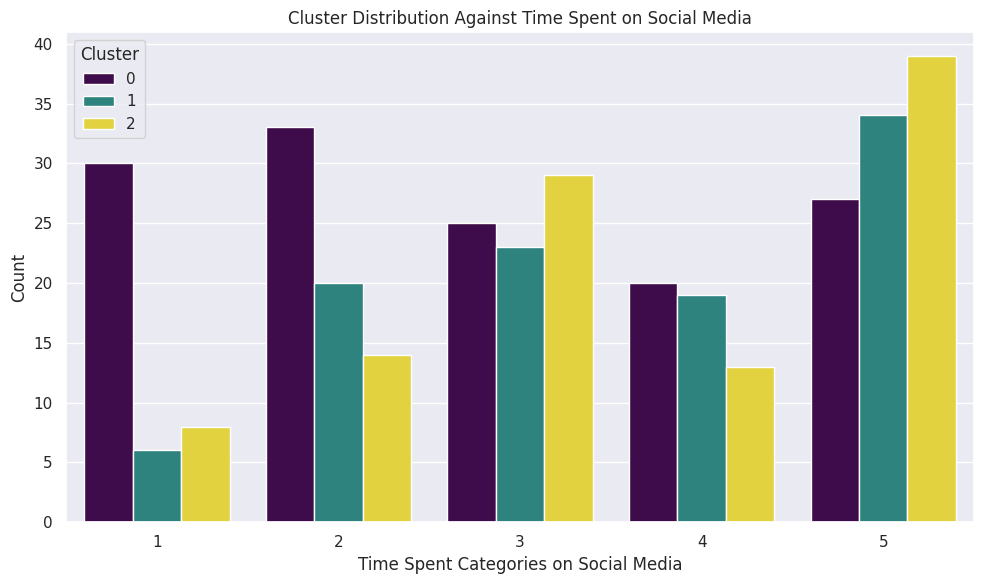

In [13]:
# Count the number of instances in each time spent category within each cluster
cluster_time_spent_counts = CleansedDF.groupby(['Cluster', 'Time_Spent']).size().reset_index(name='counts')

# Create a bar chart
plt.figure(figsize=(10, 6))
sb.barplot(x='Time_Spent', y='counts', hue='Cluster', data=cluster_time_spent_counts, palette='viridis')

plt.title('Cluster Distribution Against Time Spent on Social Media')
plt.xlabel('Time Spent Categories on Social Media')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.tight_layout()  # Adjust the layout to fit the figure neatly
plt.show()


## Analysis of results 

### Cluster Centroids Interpretation
Cluster Centroids is represented by 6 digits, each digit represents the most frequency level for each of the 6 features 

- **Cluster 0**: [2, 1, 2, 1, 1, 1]. This cluster generally represents respondents with low frequencies across the measured features.
- **Cluster 1**: [3, 3, 3, 2, 2, 3]. This group exhibits moderate levels for all features, with frequencies typically ranging from 2 to 3.
- **Cluster 2**: [3, 4, 4, 3, 5, 4]. This cluster represents respondents with moderate to high frequency levels for all measured features.

### Time Spent on Social Media Analysis
Looking at the bar chart, which shows the distribution of respondents across different levels of "Time Spent on Social Media," we can draw the following insights:

- **Cluster 1**: With centroids [3, 3, 3, 2, 2, 3], more than half of the respondents fall into levels 4 and 5 of time spent on social media, indicating significant usage among this group.
- **Cluster 2**: The centroids [3, 4, 4, 3, 5, 4] also show that more than half of the respondents are in levels 4 and 5, suggesting that this group has a similar pattern of high social media usage.
- **Cluster 0**: The centroid [2, 1, 2, 1, 1, 1] represents a more evenly distributed group regarding time spent on social media. This cluster shows a lower tendency for high social media usage, with respondents spread across different time-spent levels.

By analyzing the clusters, we can see clear distinctions in behavior patterns related to social media usage. Clusters 1 and 2 are characterized by higher frequencies of usage, while Cluster 0 displays a more balanced and lower level of usage.



# Part 3: Support Vector Machine

## Introducing Total Score and Outcome

### Purpose of SVM
Support Vector Machines (SVMs) are used for classification tasks. They find the best line or boundary to separate different groups of data. In general, SVMs are powerful because they can handle complex data and still create clear separations between groups, which makes them useful for a variety of classification problems. In our analysis, the SVM helps classify survey participants into distinct clusters based on their social media usage and related behaviors. The goal is to determine whether a person belongs to Cluster 0, which indicates lower engagement with social media, or to Clusters 1 and 2, suggesting higher engagement with potentially negative outcomes. If a participant is classified into Clusters 1 and 2, it might be an indication that they need to reduce their social media usage.

### How SVM Works
SVMs work by identifying a "hyperplane," or a line in simpler terms, that best separates different categories of data. In our case, we use the SVM to classify participants based on a total score derived from their responses to a survey. The SVM learns from the data by figuring out the best way to split it into two distinct groups—those with lower social media activity (Cluster 0) and those with higher activity (Clusters 1 and 2). The SVM can handle a range of data complexities and can be tuned to give the best results in classification.

### How We Get the Benchmark
The benchmark of 16 comes from summing the central centroids of Cluster 1: [3, 3, 3, 2, 2, 3]. The central centroid represents the typical characteristics of that cluster, indicating moderate social media-related behaviors. By using the total score from these characteristics, we create a simple measure to classify survey participants.

### Why We Use the Benchmark
We use the benchmark of 16 because it creates a clear threshold to categorize people into distinct groups. This benchmark is valuable because it allows the SVM to find a consistent boundary between low-engagement (Cluster 0) and high-engagement groups (Clusters 1 and 2). Low engagement cluster is represented by 0 under outcome, while high-engegement cluster is represented by 1 under outcome. If a person's total score is 16 or above, they will be in the high-engegement cluster, suggesting that they might benefit from reducing their social media usage. This clear division simplifies the process of classification and helps us focus on those who might need guidance to reduce their social media use.

In [14]:
# 6 variables determined to be significantly related to Time Spent on Socila Media from chi-sqaure test 
features = ['Mindless Scrolling Frequency', 'Social Media distraction Frequency', 'Restlessness Frequency', 'Worry frequency', 'Self comparisons frequency', 'Depressed emotion frequency']
# drop the other variables
CleansedDF=CleansedDF.drop(['Self invalidation frequency','Cluster','Concentration difficulty frequency','Social media validation seeking frequency','Daily activity interest fluctuation frequency','Sleep issue frequency', 'Distracted frequency'], axis=1)

#Input Total Score into CleansedDF
CleansedDF['Total Score'] = CleansedDF[features].sum(axis=1)
CleansedDF


,Time_Spent,Mindless Scrolling Frequency,Social Media distraction Frequency,Restlessness Frequency,Worry frequency,Self comparisons frequency,Depressed emotion frequency,Total Score
0,2,4,2,2,1,2,4,15
1,5,3,2,2,3,5,4,19
2,3,2,1,1,3,3,3,13
3,5,3,1,1,3,5,3,16
4,2,2,4,4,3,3,3,19
...,...,...,...,...,...,...,...,...
469,4,1,1,1,1,3,1,8
470,1,1,1,1,3,5,4,15
471,5,4,3,2,3,1,3,16
473,2,3,3,3,2,4,3,18


In [15]:
#Transform Total Score into Categorical Data stored under Outcome
def map_score(score):
  if score < 16:
    return "0"
  elif score >= 16:
    return "1"

CleansedDF['Outcome']= CleansedDF['Total Score'].apply(lambda score: map_score(score))
CleansedDF['Outcome'] = CleansedDF['Outcome'].astype('int64')

In [16]:
CleansedDF

,Time_Spent,Mindless Scrolling Frequency,Social Media distraction Frequency,Restlessness Frequency,Worry frequency,Self comparisons frequency,Depressed emotion frequency,Total Score,Outcome
0,2,4,2,2,1,2,4,15,0
1,5,3,2,2,3,5,4,19,1
2,3,2,1,1,3,3,3,13,0
3,5,3,1,1,3,5,3,16,1
4,2,2,4,4,3,3,3,19,1
...,...,...,...,...,...,...,...,...,...
469,4,1,1,1,1,3,1,8,0
470,1,1,1,1,3,5,4,15,0
471,5,4,3,2,3,1,3,16,1
473,2,3,3,3,2,4,3,18,1


In [17]:
X = CleansedDF[features]
y = CleansedDF['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)


# Model Prediction against test set
predictions = svm_model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:",accuracy)

Accuracy: 0.9019607843137255


## Analysis of results

With an accuracy of 0.902, our model is fairly accurate in classifying if the user belongs in cluster 0, or 1 and 2, based off our K-Modes clustering. 

Below is our implementation of the SVM, that will retrive the user input and determine which cluster they belong in. Please do give this a try yourself, and see if you should be reducing your social media usage,

In [18]:
# Prepare user data for prediction
def user_submit():
    #retrive input, and convert all of them to our normalized data form.
    print("Answer all the questions from a scale of 1-5\n")
    msf = convert_msf(int(input("How often do you find yourself using Social media without a specific purpose?\n")))
    smd= convert_smdf(int(input("How often do you get distracted by Social media when you are busy doing something?\n")))
    rf= convert_rf(int(input("How often you feel restless if you haven't used Social media in a while?\n")))
    wf= convert_wf(int(input("How much are you bothered by worries?\n")))
    scf= convert_scf(int(input("How often do you compare yourself to other successful people through the use of social media?\n")))
    de= convert_def(int(input("How often do you feel depressed or down?\n")))

    # Create a DataFrame using user input
    usr = pd.DataFrame({
        "Mindless Scrolling Frequency":[msf],
        "Social Media distraction Frequency":[smd],
        "Restlessness Frequency":[rf],
        "Worry frequency":[wf],
        "Self comparisons frequency":[scf],
        "Depressed emotion frequency":[de]
    })
    # Make predictions using the loaded model
    prediction = svm_model.predict(usr)
    
    if prediction == 1:
        prediction_text = "at risk"
    else:
        prediction_text = "not at risk"
    
    print("Prediction Result:")
    print("Based on the provided information, you are", prediction_text, "of mental health illness over social media.")

user_submit()

Answer all the questions from a scale of 1-5

Prediction Result:
Based on the provided information, you are not at risk of mental health illness over social media.


## Limitations 

The flaw of SVM is that it takes the assumption where all items have the same weightage. We will now explore 1 more model, namely the Multi Logistic Regression, which will take the idea that every input has a weightage, and provide a regression model for it.

# Part 4: Multinomial Logistic Regression

Multinomial logistic regression is a statistical technique used to model relationships between multiple categorical dependent and independent variables. It allows predicting the probability of each category of the dependent variable, thereby classifying observations or categories.

Here we set the independent variable to time (T) to observe the relationship between the different time people spend on social media with each dependent variable

In [19]:
CleansedDF2=CleansedDF
CleansedDF2

#drop the unnecessary/low correlation tables
X = CleansedDF2[features]
y = CleansedDF2['Time_Spent']

print("Remaining cols in X")
print(list(X.columns.values)) 

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.15, random_state = 42)

model1 = LogisticRegression(random_state=42, multi_class='multinomial', penalty='none', solver='newton-cg').fit(X_train, y_train)
preds = model1.predict(X_test)

#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = model1.get_params()
print(params)


logit_model=sm.MNLogit(y_train,sm.add_constant(X_train))
logit_model

result=logit_model.fit()
result.summary()
result.summary2()


Remaining cols in X
['Mindless Scrolling Frequency', 'Social Media distraction Frequency', 'Restlessness Frequency', 'Worry frequency', 'Self comparisons frequency', 'Depressed emotion frequency']
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 42, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Optimization terminated successfully.
         Current function value: 1.440295
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: MNLogit
==================================================================================
Model:                     MNLogit               Method:                MLE       
Dependent Variable:        Time_Spent            Pseudo R-squared:      0.084     
Date:                      2024-04-24 13:49      AIC:                   888.4906  
No. Observations:          289                   BIC:                   991.1505  
Df Model:                  24                    Log-Likelihood:        -416.25   
Df Residuals:              261                   LL-Null:               -454.63   
Converged:                 1.0000                LLR p-value:           1.9731e-07
No. Iterations:            6.0000                Scale:                 1.0000    
----------------------------------------------------------------------------------
          Time_Spent = 0            Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
----------------------------------------------------------------------------------
                             const -2.3903   0.8185 -2.9202 0.0035 -3.9946 -0.7860
      Mindless Scrolling Frequency  0.4605   0.2574  1.7891 0.0736 -0.0440  0.9649
Social Media distraction Frequency  0.1844   0.2510  0.7345 0.4627 -0.3076  0.6763
            Restlessness Frequency  0.6892   0.2751  2.5053 0.0122  0.1500  1.2285
                   Worry frequency -0.2630   0.3257 -0.8073 0.4195 -0.9013  0.3754
        Self comparisons frequency -0.1337   0.1851 -0.7224 0.4701 -0.4964  0.2290
       Depressed emotion frequency  0.2534   0.2512  1.0088 0.3131 -0.2389  0.7456
----------------------------------------------------------------------------------
          Time_Spent = 1            Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
----------------------------------------------------------------------------------
                             const -2.8599   0.8070 -3.5441 0.0004 -4.4415 -1.2783
      Mindless Scrolling Frequency  0.6869   0.2500  2.7480 0.0060  0.1970  1.1768
Social Media distraction Frequency  0.0763   0.2440  0.3129 0.7544 -0.4018  0.5545
            Restlessness Frequency  0.4294   0.2650  1.6203 0.1052 -0.0900  0.9487
                   Worry frequency  0.1603   0.3144  0.5098 0.6102 -0.4559  0.7765
        Self comparisons frequency  0.1447   0.1745  0.8289 0.4072 -0.1974  0.4868
       Depressed emotion frequency -0.0010   0.2441 -0.0041 0.9968 -0.4794  0.4774
----------------------------------------------------------------------------------
          Time_Spent = 2            Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
----------------------------------------------------------------------------------
                             const -3.0484   0.8751 -3.4833 0.0005 -4.7637 -1.3332
      Mindless Scrolling Frequency  0.6124   0.2672  2.2921 0.0219  0.0887  1.1361
Social Media distraction Frequency  0.2484   0.2584  0.9610 0.3365 -0.2582  0.7549
            Restlessness Frequency  0.6843   0.2811  2.4339 0.0149  0.1333  1.2353
                   Worry frequency -0.3189   0.3373 -0.9453 0.3445 -0.9800  0.3423
        Self comparisons frequency  0.0566   0.1904  0.2972 0.7663 -0.3166  0.4297
       Depressed emotion frequency  0.0676   0.2599  0.2600 0.7948 -0.4419  0.5771
----------------------------------------------------------------------------------
          Time_Spent = 3            Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
----------------------------------------------------------------------------------
                             const -4.5876   0.8820 -5.2012 0.0000 -6.3163 -2.8589
      Mindless Scrolling Frequency  0.9481   0.2555  3.7112 0.0002  0.4474  1.4489
Social Media distraction Frequency  0.0440   0.2436  0.1807 0.8566 -0.4335  0.5215
            Restlessness Frequency  0.9185   0.2681  3.4261 0.0006  0.3931  1.4440
                   Worry frequency  0.0813   0.3163  0.2571 0.7971 -0.5386  0.7012


In [20]:
print('Accuracy Score:', metrics.accuracy_score(y_test, preds))  
class_report=classification_report(y_test, preds)
print(class_report)

preds1 = model1.predict(X_train)
print('Accuracy Score:', metrics.accuracy_score(y_train, preds1))  
class_report=classification_report(y_train, preds1)
print(class_report)

#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
#f1 score is a performance measure
confmtrx = np.array(confusion_matrix(y_test, preds))
#Create DataFrame from confmtrx array 
#rows for test: 0-5 as index 
#columns for preds: 0-5 as column

pd.DataFrame(confmtrx, index=['1', '2','3','4', '5'],columns=['predicted_1', 'predicted_2','predicted_3', 'predicted_4', 'predicted_5'])



Accuracy Score: 0.4117647058823529
              precision    recall  f1-score   support

           1       0.17      0.20      0.18         5
           2       0.55      0.43      0.48        14
           3       0.45      0.45      0.45        11
           4       0.00      0.00      0.00         5
           5       0.41      0.56      0.47        16

    accuracy                           0.41        51
   macro avg       0.32      0.33      0.32        51
weighted avg       0.39      0.41      0.40        51

Accuracy Score: 0.3944636678200692
              precision    recall  f1-score   support

           1       0.44      0.51      0.48        39
           2       0.41      0.25      0.31        53
           3       0.29      0.29      0.29        66
           4       0.56      0.11      0.18        47
           5       0.42      0.68      0.52        84

    accuracy                           0.39       289
   macro avg       0.42      0.37      0.35       289
weighte

,predicted_1,predicted_2,predicted_3,predicted_4,predicted_5
1,1,1,1,0,2
2,1,6,2,0,5
3,0,1,5,0,5
4,2,2,0,0,1
5,2,1,3,1,9


## Analysis of results 

### Restlessness Frequency
This variable is significant for Time_Spent = 0 and Time_Spent = 3.

- **For Time_Spent = 0**:
  - **Coef.**: 0.6892
  - **P>|t|**: 0.0122
  - **Explanation**: The positive coefficient indicates that higher restlessness frequency is associated with a higher likelihood of spending less time on social media (Cluster 0). The low p-value (0.0122) suggests this relationship is statistically significant.
  - **Insights**: This finding suggests that restlessness might lead some individuals to spend less time on social media. This could be due to individuals seeking other activities or methods to cope with restlessness.

- **For Time_Spent = 3**:
  - **Coef.**: 0.9185
  - **P>|t|**: 0.0006
  - **Explanation**: The coefficient is positive, indicating that high restlessness frequency is associated with a higher likelihood of spending more time on social media (Cluster 3). The p-value (0.0006) is very low, confirming that this effect is statistically significant.
  - **Insights**: This strong positive relationship suggests that restlessness might lead to increased social media usage. It implies that social media could be a form of distraction or coping mechanism for restlessness.

### Mindless Scrolling Frequency
This variable is significant for Time_Spent = 1, Time_Spent = 2, and Time_Spent = 3.

- **For Time_Spent = 1**:
  - **Coef.**: 0.6869
  - **P>|t|**: 0.0060
  - **Explanation**: A positive coefficient indicates that higher mindless scrolling frequency is associated with this level of social media usage (Cluster 1). The p-value (0.0060) suggests this is a statistically significant finding.
  - **Insights**: This significant effect reinforces the notion that mindless scrolling can lead to moderate levels of social media usage.

- **For Time_Spent = 2**:
  - **Coef.**: 0.6124
  - **P>|t|**: 0.0219
  - **Explanation**: A positive coefficient suggests that mindless scrolling frequency correlates with this level of time spent on social media. The p-value (0.0219) indicates statistical significance.
  - **Insights**: The finding supports the view that mindless scrolling plays a consistent role in influencing social media engagement.

- **For Time_Spent = 3**:
  - **Coef.**: 0.9481
  - **P>|t|**: 0.0002
  - **Explanation**: The significant positive coefficient shows a strong relationship between mindless scrolling frequency and the highest level of social media usage (Cluster 3). The p-value (0.0002) is very low, confirming the statistical significance of this effect.
  - **Insights**: The large coefficient value and low p-value underscore the significant impact of mindless scrolling on high social media engagement, suggesting that addressing this behavior could be crucial in reducing time spent on social media.

### Features with Limited Influence
Variables such as "Social Media distraction Frequency," "Worry frequency," and "Self comparisons frequency" show mixed or low significance, indicating that they might not have a substantial impact on "Time Spent on Social Media."


# Behavioural Insights

### Proposed Interventions
A score above 16 indicates a need for action, based on our SVM Test Score. 

Based on our multinomial logistic regression model, the most significant factor affecting time spent on social media are "Restlessness Frequency" and "Mindless Scrolling Frequency." If your total score exceeds 16, it's important to focus on these two features to address excessive social media use.

**Addressing Restlessness Frequency**

1) Physical Activity
Engage in regular exercise, such as walking, jogging, or yoga, to channel restlessness into productive energy.

2) Breathing Exercises and Meditation
Learn simple breathing techniques or meditation practices to calm the mind and manage restlessness.

3) Structured Routines: Develop a daily schedule with structured activities to maintain focus and reduce feelings of restlessness.

**Reducing Mindless Scrolling**


1) Set Time Limits
Use apps or phone settings to limit social media usage to specific timeframes or a set number of hours per day.

2) Structured Social Media Use
Establish dedicated times for social media, such as during lunch breaks or after work, to reduce the urge for constant scrolling.

3) No-Phone Zones 
Create spaces or times where phones are not allowed, like at the dinner table or during family time, to encourage meaningful interactions.

4) Alternative Activities: Find engaging offline activities, such as reading, exercising, or pursuing hobbies, to replace mindless scrolling.

For total score below 16, the focus will be on maintaining their current habits:


**Reinforce Positive Behavior**

For total score below 16, the focus will be on maintaining their current habits. 





# Conclusion 

### Outcomes

1. There is a linear relationship between the amount of time students spend on social media and the impact on their mental health. The more time they spend on social media, the greater the impact on their mental health

2. Students need to manage the time they spend on social media appropriately and not overuse it. Social media is a double-edged sword. Wrong use can cause harm to the user’s mental health.



### Future possibilites 
1) Longitudinal Tracking: Monitoring changes in engagement and behavior over time could provide insights into the long-term effects of social media use and the stability of these clusters.

2) Qualitative Research: Interviews or focus groups could delve deeper into underlying reasons behind individuals’ social media use patterns and the personal meaning of the behaviors measured. This allows for more targeted interventions other than jsut reducing time spent on social media. 

3) Comparative Analysis: Comparing these clusters with other factors such as demographic data, mental health status, or offline behaviors could enrich the understanding of the context and implications of these patterns.

4) Possible improvements on our models through things like ensemble model, which combines SVM and Logistic Regression

In [21]:


# Fit the ensemble model with your trained models
ensemble_model = VotingClassifier(estimators=[('svm', svm_model), ('logistic', model1)], voting='hard')
ensemble_model.fit(X_train, y_train)  # Replace y_train with your training labels

# Make predictions using the fitted ensemble model
#ensemble_predictions = ensemble_model.predict(X_test)

ensemble_model.score(X_test, y_test)

0.4117647058823529